### Stacked News Labeling
- Comparison of heatmaps between Moonshot-v1 and GPT4-Turbo
- The union of the small set and the medium set are used.
- Note that the number of data entries in gpt4-turbo-128k_stacked_news_labeling.jsonl is slightly fewer than mooshot-v1_stacked_news_labeling.jsonl. This is because a small number of samples encountered HTTP_ERROR or UNKNOWN_ERROR even after 5 attempts with GPT4-Turbo, and we ignored these samples, only evaluating valid responses.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import json
import os
import glob

In [2]:
# read data 
import jsonlines 
from tqdm import tqdm 
import pandas as pd 
json_data_file = "./gpt4-turbo-128k_stacked_news_labeling.jsonl"
def translate_pos_ratio(pos_ratio):
    interval_width = 1. / 12
    half_interval_width = interval_width / 2.
    return round((int(pos_ratio / interval_width) * interval_width + half_interval_width)*100,2)

def traslate_context_length(cur_length):
    interval = 16
    max_context_length = 44200.
    interval_length = max_context_length / interval
    int_number = int(cur_length / interval_length)
    res = int_number * interval_length + interval_length/2.
    return res 

def create_pivot_table(json_data_file: str):
    df_list = []
    with jsonlines.open(json_data_file, "r") as f_reader:
        for cur_json_obj in tqdm(f_reader):
            df_list.append([cur_json_obj['internlm2_length'], cur_json_obj['pos_ratio'], cur_json_obj['score']])
    df = pd.DataFrame(df_list, columns=['context_length', 'context_depth', "score"])
    df['pos_ratio']  = df['context_depth'].apply(translate_pos_ratio)
    df['avg_context_length'] = df['context_length'].apply(traslate_context_length)

    df = df[['avg_context_length', 'pos_ratio', 'score']]
    aggregated_df = df.groupby(['avg_context_length', 'pos_ratio'])['score'].mean().reset_index()
    print (aggregated_df.head())
    print (f"You have {len(aggregated_df)} rows")
    pivot_table = aggregated_df.pivot(index='pos_ratio', columns='avg_context_length', values='score')
    # pivot_table.iloc[:5, :5]
    return pivot_table

def save_figure(pivot_table, save_name, title):
    cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])

    plt.figure(figsize=(19, 6)) 
    sns.heatmap(
        pivot_table,
        vmin=0.0,
        vmax=1,
        # annot=True,
        fmt="g",
        cmap=cmap,
        cbar_kws={'label': 'Accuracy'}
    )

    # More aesthetics
    plt.title( title, fontsize=20)  # Adds a title
    plt.xlabel('Token Limit', fontsize=20)  # X-axis label
    plt.ylabel('Depth Percent', fontsize=20)  # Y-axis label
    plt.xticks(rotation=45)  # Rotates the x-axis labels to prevent overlap
    plt.yticks(rotation=0)  # Ensures the y-axis labels are horizontal
    plt.tight_layout()  # Fits everything neatly into the figure area

    plt.savefig(save_name, format="pdf", bbox_inches='tight')


27193it [00:00, 479606.53it/s]


   avg_context_length  pos_ratio     score
0             1381.25       4.17  0.857143
1             1381.25      12.50  0.962963
2             1381.25      20.83  0.937500
3             1381.25      29.17  0.882353
4             1381.25      37.50  0.937500
You have 192 rows


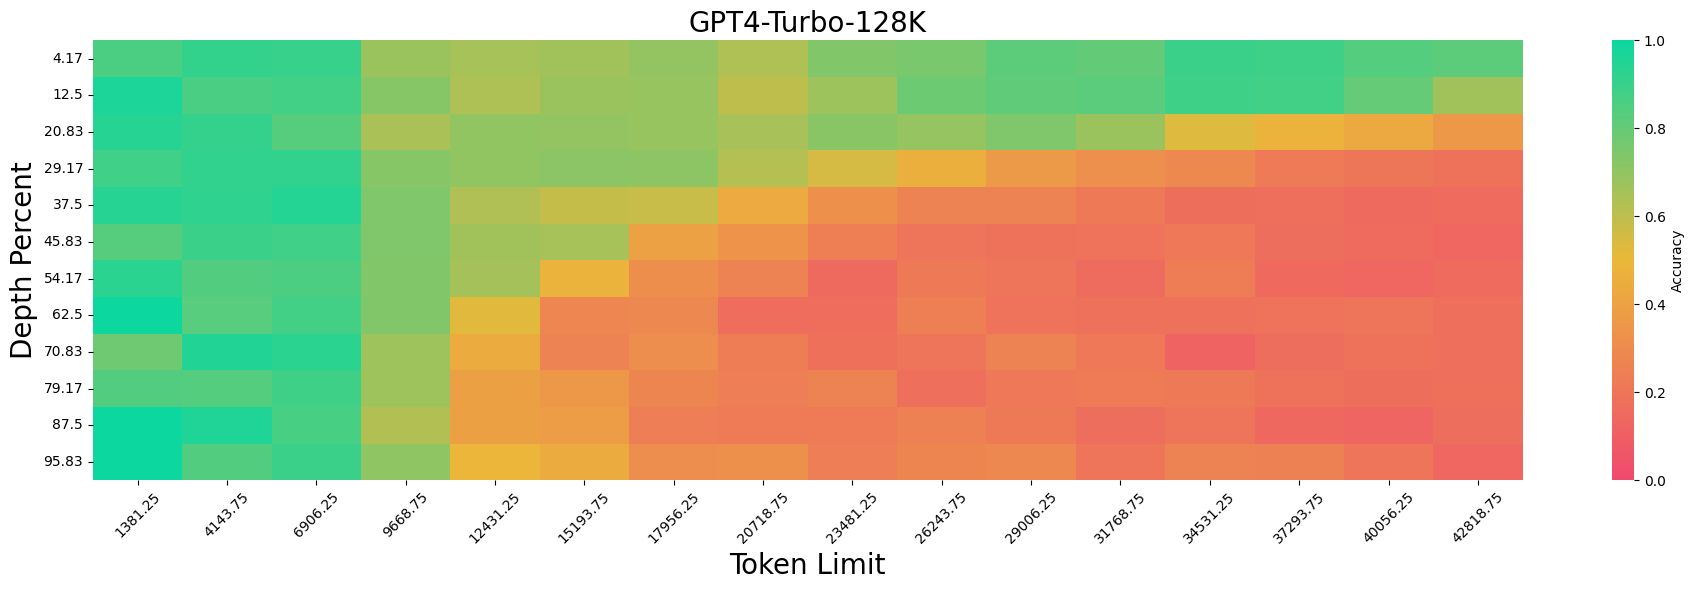

In [3]:
# gpt4-turbo-128k

json_data_file = "./gpt4-turbo-128k_stacked_news_labeling.jsonl"
pivot_table = create_pivot_table(json_data_file)
save_figure(pivot_table, "gpt4-turbo-128k_heat_map.pdf", "GPT4-Turbo-128K")


29847it [00:00, 480112.41it/s]


   avg_context_length  pos_ratio     score
0             1381.25       4.17  0.714286
1             1381.25      12.50  0.925926
2             1381.25      20.83  0.937500
3             1381.25      29.17  0.882353
4             1381.25      37.50  0.937500
You have 192 rows


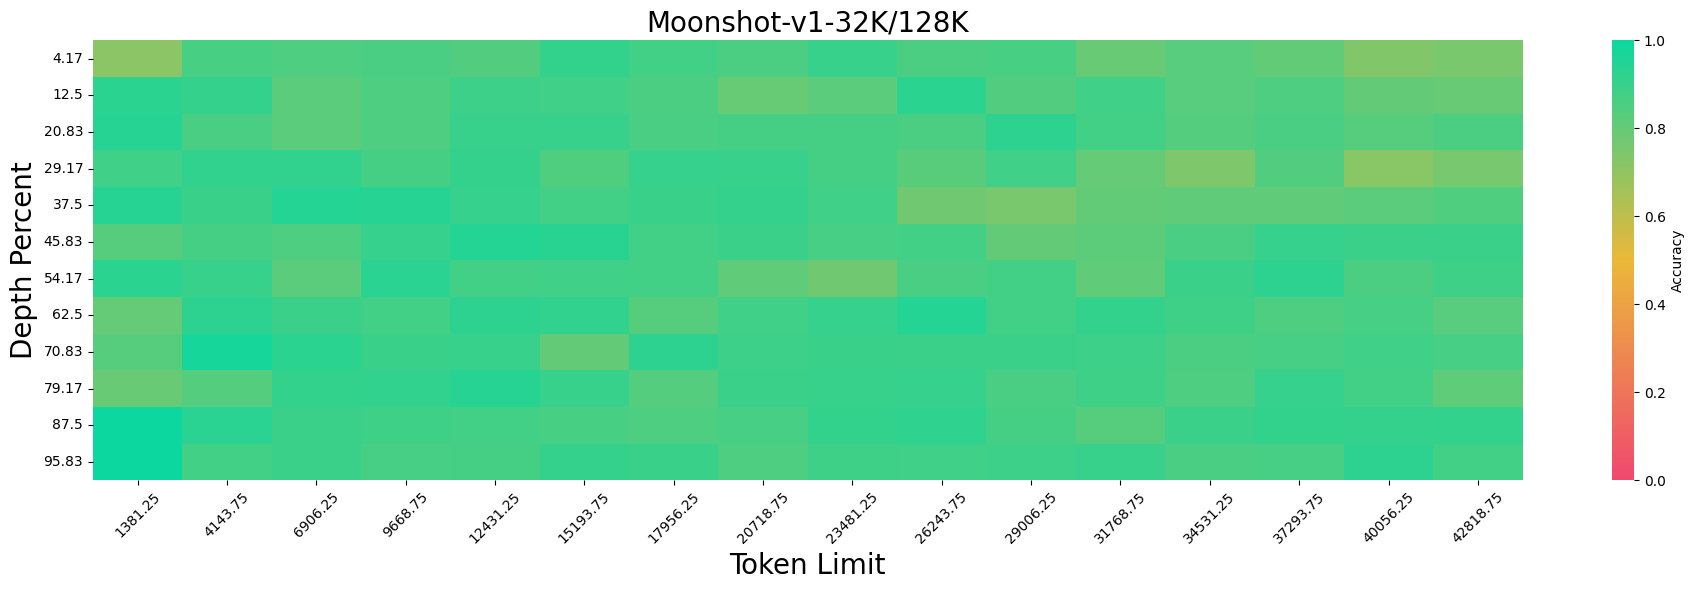

In [4]:
# moonshot-v1-32K/128K
json_data_file = "./mooshot-v1_stacked_news_labeling.jsonl"
pivot_table = create_pivot_table(json_data_file)
save_figure(pivot_table, "moonshot-v1_heat_map.pdf", "Moonshot-v1-32K/128K")


29843